DS ESA12 Clustering KMeans (Polczynski)
---------------
Analyse this dataset: [1] which looks like this:
```
[ -5.34023562,   4.7472463 ,   3.82332607],
[ -9.58706542,  -3.43446551,   9.70183939],
[ -8.38501223,  -3.90279369,   8.51462008],
[  5.7082258 ,   2.65857479,   5.40448245],
[ -7.43166517,  -4.39025105,   9.00321635],
[  5.028509  ,   9.04769521,  -8.54843651],
[  6.37219562,   4.45994039,   4.36935755],
[ -8.35525163,  -3.51695636,   7.16271385],
[ -3.40526552,   2.28142739,  -7.63117179],
[  5.62156138,   3.43105644,   4.66657363],
...
```
and 90 more => n = 100
Now answer these two questions:

A) What is the best k?

B) Can you print the classification/clustering vector? (e.g. point i=1 belongs to cluster 1, point i=5 belongs to cluster 2, ...)

In [1]:
# read csv
import pandas as pd
df = pd.read_csv("ds_esa12_edlich-kmeans-A0.csv")

# print out shape and first 10 rows
print(df.shape)
print(df.head(10))

(100, 3)
         V1        V2        V3
0 -5.340236  4.747246  3.823326
1 -9.587065 -3.434466  9.701839
2 -8.385012 -3.902794  8.514620
3  5.708226  2.658575  5.404482
4 -7.431665 -4.390251  9.003216
5  5.028509  9.047695 -8.548437
6  6.372196  4.459940  4.369358
7 -8.355252 -3.516956  7.162714
8 -3.405266  2.281427 -7.631172
9  5.621561  3.431056  4.666574


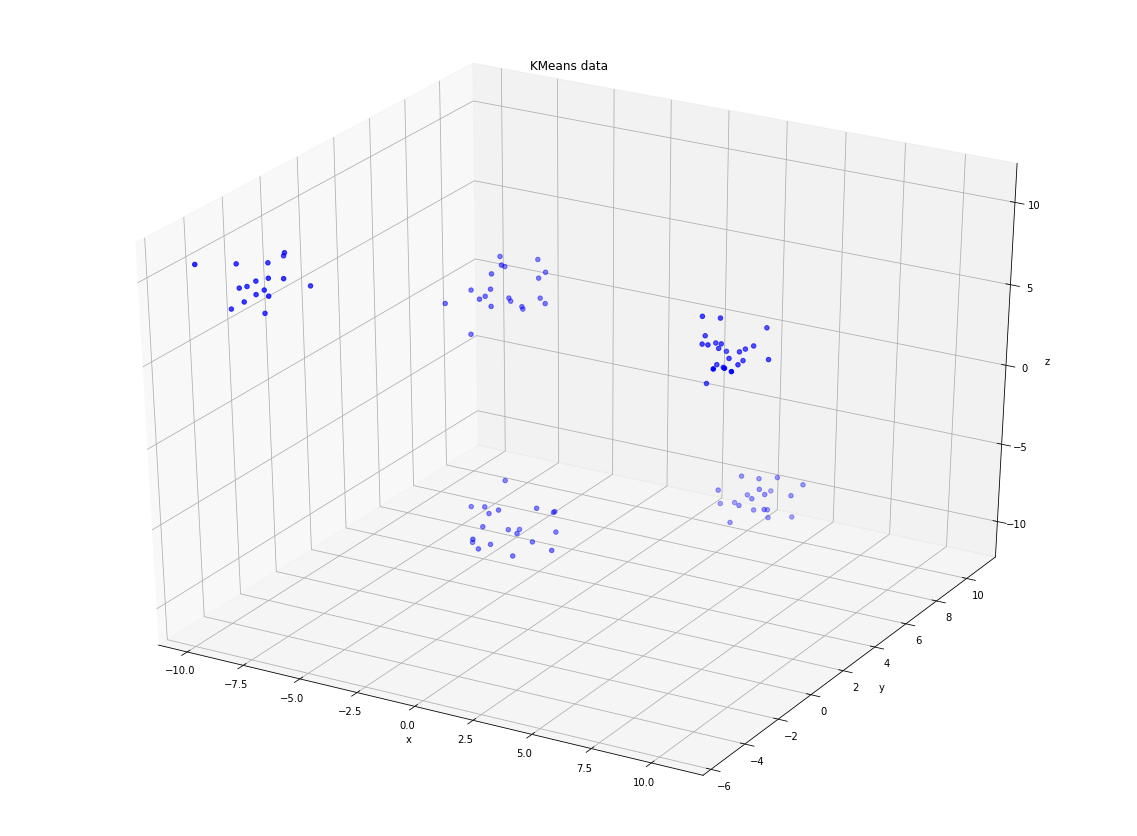

In [3]:
# needed to print 3d data of csv
#https://matplotlib.org/mpl_examples/mplot3d/scatter3d_demo.py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('KMeans data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c='b', marker='o')
plt.show()

     k                                             kmeans       inertia
0    1  KMeans(algorithm='auto', copy_x=True, init='k-...  10260.706785
1    2  KMeans(algorithm='auto', copy_x=True, init='k-...   4899.629957
2    3  KMeans(algorithm='auto', copy_x=True, init='k-...   2409.509879
3    4  KMeans(algorithm='auto', copy_x=True, init='k-...   1278.182057
4    5  KMeans(algorithm='auto', copy_x=True, init='k-...    441.623289
5    6  KMeans(algorithm='auto', copy_x=True, init='k-...    213.750353
6    7  KMeans(algorithm='auto', copy_x=True, init='k-...    193.702737
7    8  KMeans(algorithm='auto', copy_x=True, init='k-...    175.507892
8    9  KMeans(algorithm='auto', copy_x=True, init='k-...    159.457178
9   10  KMeans(algorithm='auto', copy_x=True, init='k-...    149.600447
10  11  KMeans(algorithm='auto', copy_x=True, init='k-...    141.911622
11  12  KMeans(algorithm='auto', copy_x=True, init='k-...    131.630446
12  13  KMeans(algorithm='auto', copy_x=True, init='k-...    121

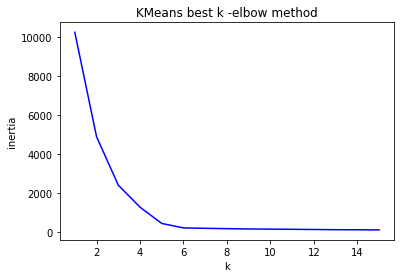

In [4]:
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

# k from 1 to 15
kdf = pd.DataFrame({"k": range(1,16)})
kdf["kmeans"] = kdf.apply( lambda row: KMeans(n_clusters=row["k"], random_state=0).fit(df.values), axis=1)

# Sum of squared distances of samples to their closest cluster center.
kdf["inertia"] = kdf.apply( lambda row: row["kmeans"].inertia_, axis=1)

# output
print(kdf)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('KMeans best k -elbow method')
ax.set_xlabel('k')
ax.set_ylabel('inertia')

ax.plot(kdf["k"], kdf["inertia"], 'b')
plt.show()

It seems 5 or 6 is our best k. __We will continue with 6 as k>6 brings no significant reduction in inertia.__

Now draw the cluster/classification vector.

Cluster Centers:
           x         y         z
0   3.665368  8.910750 -9.065798
1  -8.532420 -3.554015  8.968577
2   5.882405  3.590739  4.605080
3  -2.403317  2.147529 -8.023789
4  -5.106915  5.601798  3.719569
5  10.399197 -3.204062  9.163650
Cluster association of data points:
[4 1 1 2 1 0 2 1 3 2 1 3 2 0 4 1 3 0 4 4 1 3 4 1 1 5 3 3 3 0 3 3 0 0 1 4 0
 4 3 1 0 0 0 4 0 1 2 2 0 2 2 0 3 3 2 2 4 2 1 0 2 4 5 2 0 2 4 4 4 0 0 2 3 2
 2 3 1 0 2 3 3 0 1 4 4 1 4 4 4 2 3 3 3 1 5 2 3 0 4 4]


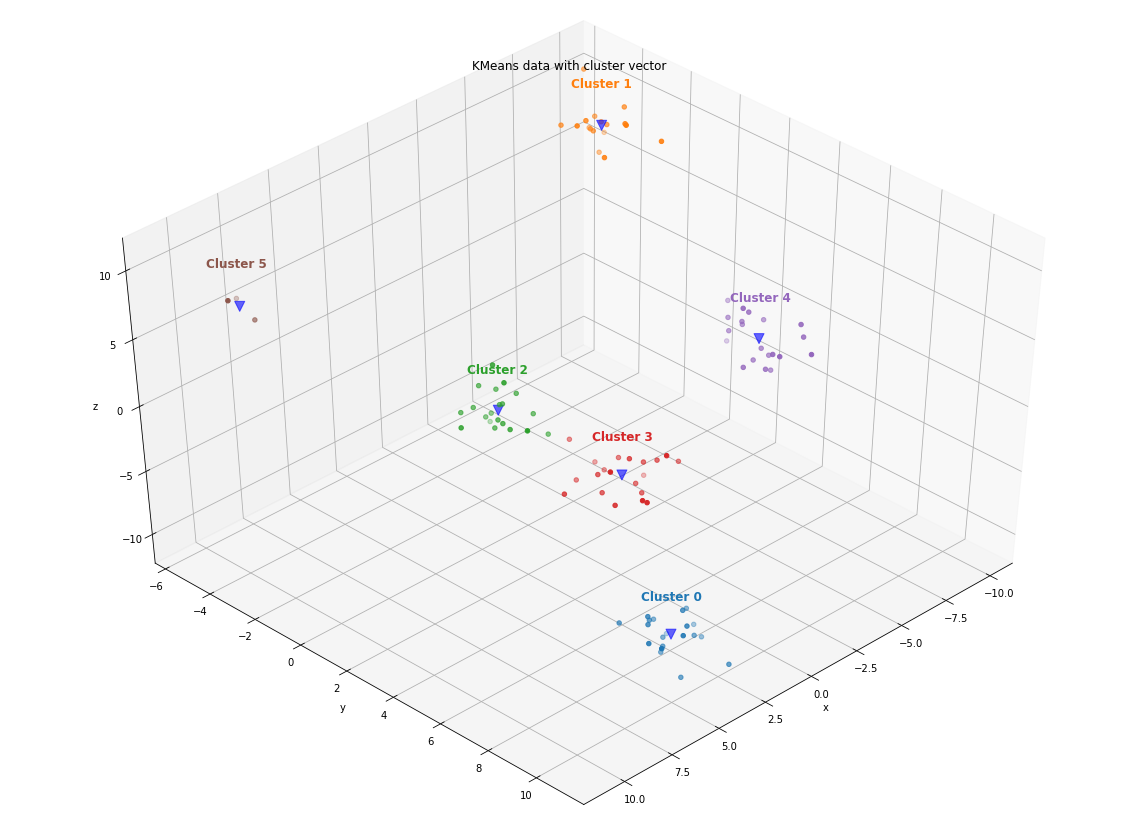

In [5]:
# setup data of selected bestk
bestk = 6
rangecluster = range(0,bestk)
kmeans = kdf["kmeans"][bestk-1]

# get dataframe of cluster centers
bkdf = pd.DataFrame( kmeans.cluster_centers_, columns=["x", "y", "z"] )

print("Cluster Centers:")
print(bkdf)

print("Cluster association of data points:")
print(kmeans.labels_)
df["cluster"] = kmeans.labels_

# setup plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('KMeans data with cluster vector')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# plot center points
ax.scatter(bkdf.iloc[:,0], bkdf.iloc[:,1], bkdf.iloc[:,2], c='b', marker='v', alpha=0.6, s=100)

# retrieve default colormap
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# plot by cluster (each time different color)
for cluster in rangecluster:
    # select cluster
    cdf = df.loc[df["cluster"] == cluster]
    
    # plot cluster
    ax.scatter(cdf.iloc[:,0], cdf.iloc[:,1], cdf.iloc[:,2], c=colors[cluster], marker='o')
    
    # cluster label
    ax.text(bkdf.iloc[cluster,0], bkdf.iloc[cluster,1], bkdf.iloc[cluster,2]+3, "Cluster {}".format(cluster), None, va='center', ha='center', color=colors[cluster], weight='bold', size='larger')

# rotate our plot so we see all clusters better (k=6 indicates 6 but previously we only saw 5)
ax.view_init(45, 45) 

# output
plt.show()

__As we can see 6 clusters after rotation of the chart, it confirms that indeed k=6 was the correct choice.__